In [1]:
import pandas as pd

df = pd.read_csv('../data/cubes.csv', low_memory=False)
df

,Unnamed: 0,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Door,Humidity Layer A,Humidity Layer B
0,0,49,1451606401,NaN,NaN,0.0,NaN,NaN
1,1,95,1451606402,NaN,25.711898671792053°C,NaN,NaN,NaN
2,2,48,1451606402,NaN,NaN,NaN,NaN,NaN
3,3,55,1451606402,NaN,NaN,NaN,NaN,8.594411333817883g/m3
4,4,90,1451606403,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
400282,400282,37,1455929708,NaN,NaN,NaN,NaN,NaN
400283,400283,74,1455929721,NaN,NaN,NaN,NaN,NaN
400284,400284,6,1455929825,NaN,NaN,NaN,NaN,NaN
400285,400285,36,1455929967,NaN,NaN,NaN,NaN,NaN


In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].min()

In [4]:
df['Temperature Layer A'] = df['Temperature Layer A'].str.replace('°C', '')
df['Temperature Layer B'] = df['Temperature Layer B'].str.replace('°C', '')

df['Humidity Layer A'] = df['Humidity Layer A'].str.replace('g/m3', '')
df['Humidity Layer B'] = df['Humidity Layer B'].str.replace('g/m3', '')

In [5]:
df

,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Door,Humidity Layer A,Humidity Layer B
0,49,0,NaN,NaN,0.0,NaN,NaN
1,95,1,NaN,25.711898671792053,NaN,NaN,NaN
2,48,1,NaN,NaN,NaN,NaN,NaN
3,55,1,NaN,NaN,NaN,NaN,8.594411333817883
4,90,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
400282,37,4323307,NaN,NaN,NaN,NaN,NaN
400283,74,4323320,NaN,NaN,NaN,NaN,NaN
400284,6,4323424,NaN,NaN,NaN,NaN,NaN
400285,36,4323566,NaN,NaN,NaN,NaN,NaN


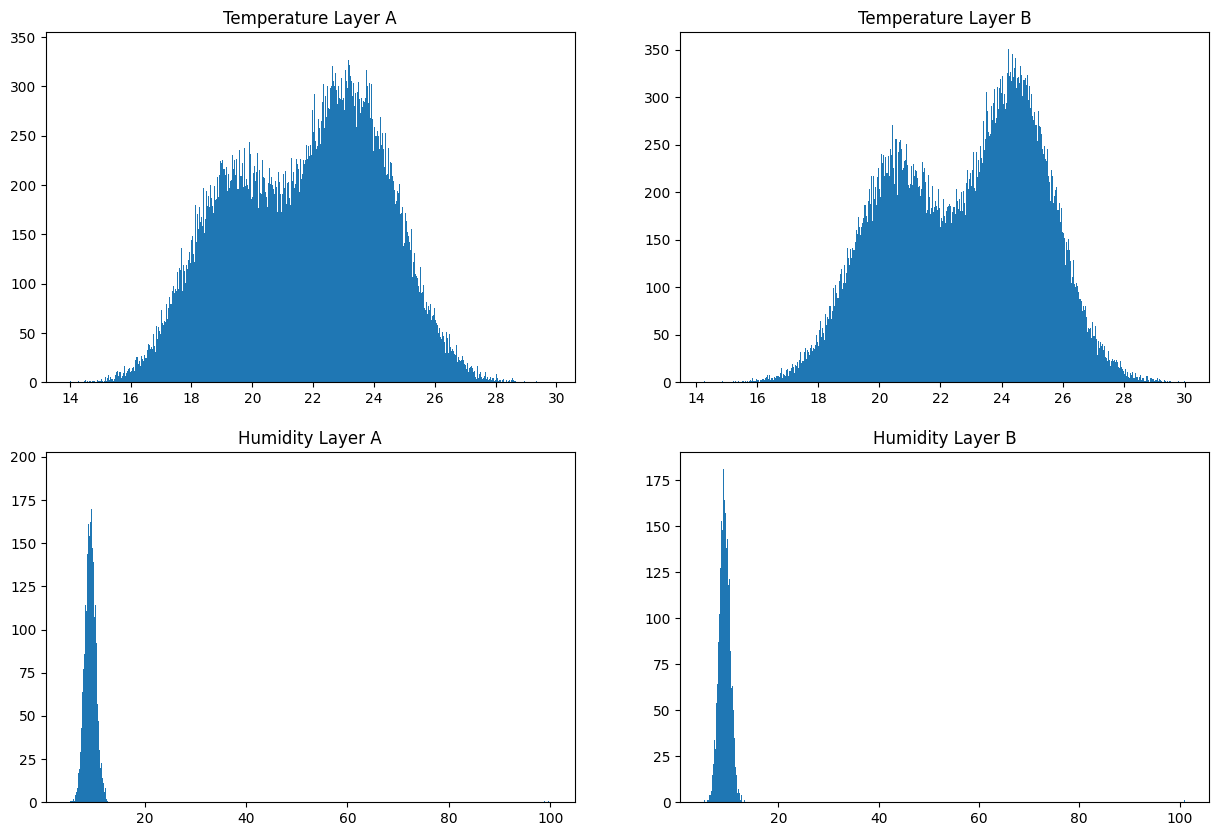

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

bins = 1000

fig, axs = plt.subplots(2, 2)

vectorize = lambda X : np.float64([x for x in X])

axs[0, 0].hist(vectorize(df['Temperature Layer A'].values), bins=bins)
axs[0, 0].set_title('Temperature Layer A')

axs[0, 1].hist(vectorize(df['Temperature Layer B'].values), bins=bins)
axs[0, 1].set_title('Temperature Layer B')

axs[1, 0].hist(vectorize(df['Humidity Layer A'].values), bins=bins)
axs[1, 0].set_title('Humidity Layer A')

axs[1, 1].hist(vectorize(df['Humidity Layer B'].values), bins=bins)
axs[1, 1].set_title('Humidity Layer B')

plt.show()

In [7]:
df.to_csv('../data/cubes_processed.csv', index=False)